In [34]:
from pandas import read_csv
import numpy as np

In [35]:
df=read_csv("international-airline-passengers.csv",usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [36]:
values=df.values.astype("float32")
values.shape[0]

144

In [37]:
train_size=int(values.shape[0]* 0.67)
test_size=values.shape[0]-train_size

train= values[0:train_size]
test= values[train_size:]

In [38]:
train


array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_scale_data=scaler.fit_transform(train)
test_scale_data=scaler.transform(test)

In [40]:
def creating_dataset(data,k):
    xdata,ydata=[],[]
    
    for i in range(data.shape[0]-k):
        x=data[i:i+k,0]
        y=data[i+k,0]
        xdata.append(x)
        ydata.append(y)
    return np.array(xdata),np.array(ydata)

In [41]:
lookback=12
trainx,trainy=creating_dataset(train_scale_data,lookback)
testx,testy=creating_dataset(test_scale_data,lookback)

In [42]:
trainx=np.reshape(trainx,(trainx.shape[0],trainx.shape[1],1))
testx=np.reshape(testx,(testx.shape[0],testx.shape[1],1))
trainx.shape

(84, 12, 1)

In [43]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,LSTM

In [44]:
model=Sequential()
model.add(LSTM(100,input_shape=(lookback,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])
model.fit(trainx,trainy,epochs=20,batch_size=1)

Epoch 1/20
84/84 [==============================] - 7s 88ms/step - loss: 0.0422 - acc: 0.0000e+00
Epoch 2/20
84/84 [==============================] - 3s 34ms/step - loss: 0.0195 - acc: 0.0000e+00
Epoch 3/20
84/84 [==============================] - 3s 35ms/step - loss: 0.0163 - acc: 0.0000e+00
Epoch 4/20
84/84 [==============================] - 3s 34ms/step - loss: 0.0141 - acc: 0.0000e+00
Epoch 5/20
84/84 [==============================] - 3s 35ms/step - loss: 0.0135 - acc: 0.0000e+00
Epoch 6/20
84/84 [==============================] - 3s 34ms/step - loss: 0.0140 - acc: 0.0000e+00
Epoch 7/20
84/84 [==============================] - 3s 35ms/step - loss: 0.0124 - acc: 0.0000e+00
Epoch 8/20
84/84 [==============================] - 3s 34ms/step - loss: 0.0120 - acc: 0.0000e+00
Epoch 9/20
84/84 [==============================] - 3s 41ms/step - loss: 0.0107 - acc: 0.0000e+00
Epoch 10/20
84/84 [==============================] - 3s 41ms/step - loss: 0.0110 - acc: 0.0000e+00
Epoch 11/20
84/84 [

In [45]:
test_predict=model.predict(testx)
test_predict=scaler.inverse_transform(test_predict).ravel()
test_predict.shape

train_predict=model.predict(trainx)
train_predict=scaler.inverse_transform(train_predict).ravel()

train_true=scaler.inverse_transform([trainy]).ravel()
test_true=scaler.inverse_transform([testy]).ravel()

In [46]:
from matplotlib import pyplot as plt

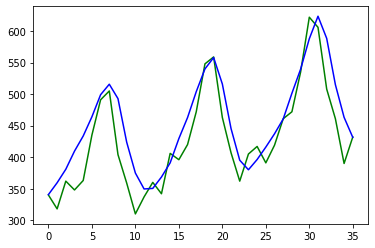

In [47]:
plt.plot(test_true,c='g')
plt.plot(test_predict,c='b')
plt.show()

In [48]:
combaintrain=np.concatenate((train_predict,test_predict))
combaintrue=np.concatenate((train_true,test_true))

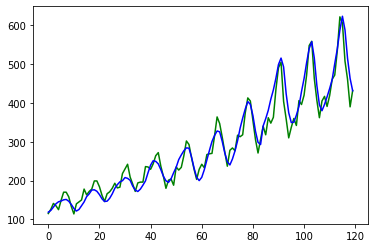

In [49]:
plt.plot(combaintrue,c='g')
plt.plot(combaintrain,c='b')
plt.show()